## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지


# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sb

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# k-means clustering

## Dataset 불러오기 및 data 정보 확인

### Dataset 불러오기

In [2]:
df_iris = pd.read_csv('C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\iris.csv',
                       index_col = 'Unnamed: 0')
df_data = df_iris.drop('Species', axis = 1)

df_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


### Dataset의 대략적인 분포 확인

산점도 행렬
https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

In [3]:
# sb.pairplot( df_iris, hue = 'Species')

## k값 선정

### 모델 학습에 사용할 x값(예측변수) 설정

In [4]:
x = df_data[ ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'] ]

### k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택
- 
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

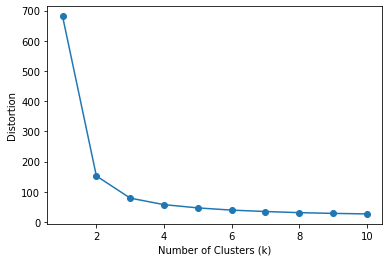

In [5]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    cluster_kmeans = KMeans( n_clusters = i,
                             init = 'random',
                             max_iter = 300,
                             random_state = 153 )
    model = cluster_kmeans.fit(x)
    inertia.append(model.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 군집화 수행
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [6]:
# k를 3개로 설정 

cluster_kmeans = KMeans( n_clusters = 3,
                         init = 'random',
                         max_iter = 300,
                         random_state = 153 )

# 모델 학습
model = cluster_kmeans.fit(x)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [7]:
# 분류된 군집화 값 확인
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
# 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_data['km_cluster'] = model.labels_

df_data.groupby( ['km_cluster'] ).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
km_cluster,,,,
0,62,62,62,62
1,50,50,50,50
2,38,38,38,38


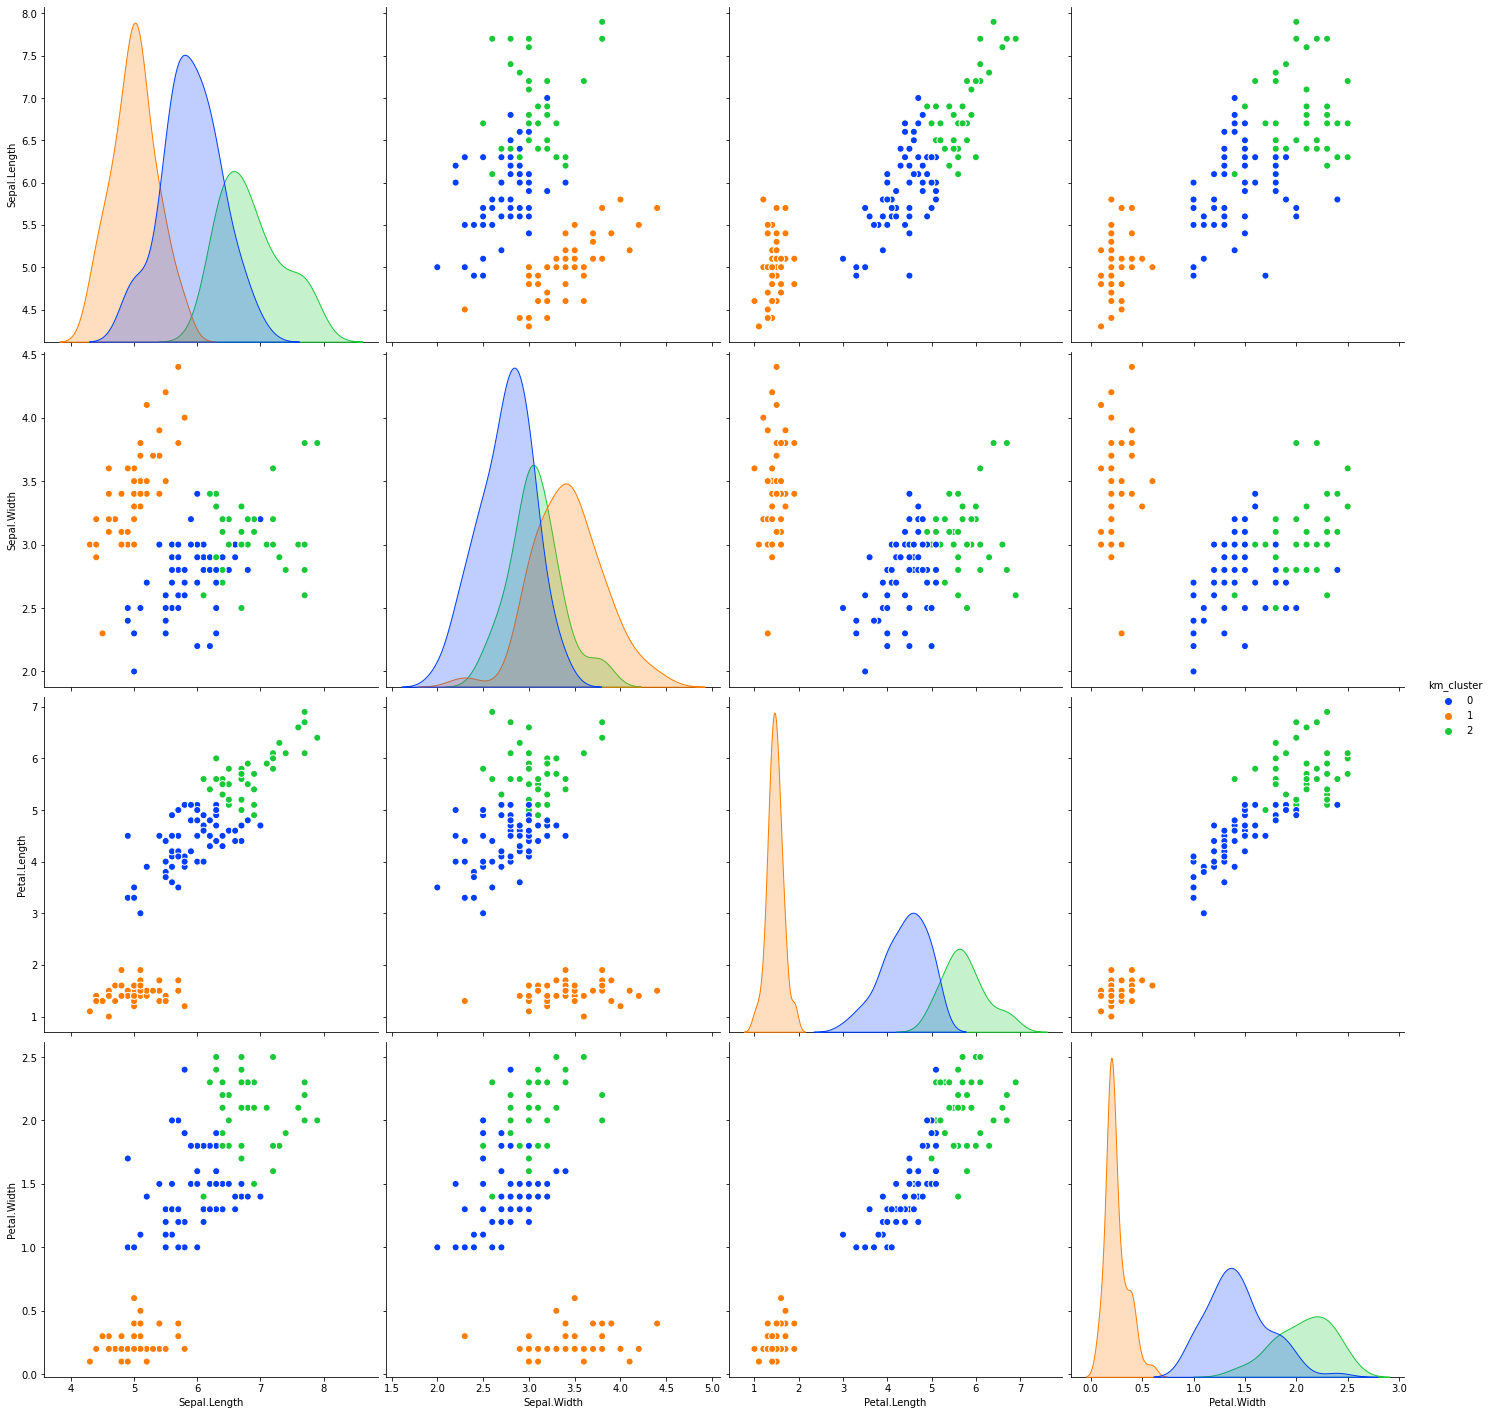

In [9]:
sb.pairplot( df_data,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 실제 iris data와 비교

In [10]:
# iris 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_iris['km_cluster'] = model.labels_

df_iris.groupby( ['Species', 'km_cluster'] ).count()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    km_cluster                                                      
setosa     1                     50           50            50           50
versicolor 0                     48           48            48           48
           2                      2            2             2            2
virginica  0                     14           14            14           14
           2                     36           36            36           36

In [11]:
# 실제 값과 군집화된 값들을 비교하여 
# 분류된 군집화 값들에 해당하는 Species 이름을 데이터프레임에 입력

df_iris['km_cluster'] = df_iris['km_cluster'].apply( lambda x: 'setosa' if 0 == x
                                                     else ('versicolor' if 1 == x
                                                     else 'virginica') )
df_iris.groupby( ['Species', 'km_cluster'] ).count()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    km_cluster                                                      
setosa     versicolor            50           50            50           50
versicolor setosa                48           48            48           48
           virginica              2            2             2            2
virginica  setosa                14           14            14           14
           virginica             36           36            36           36

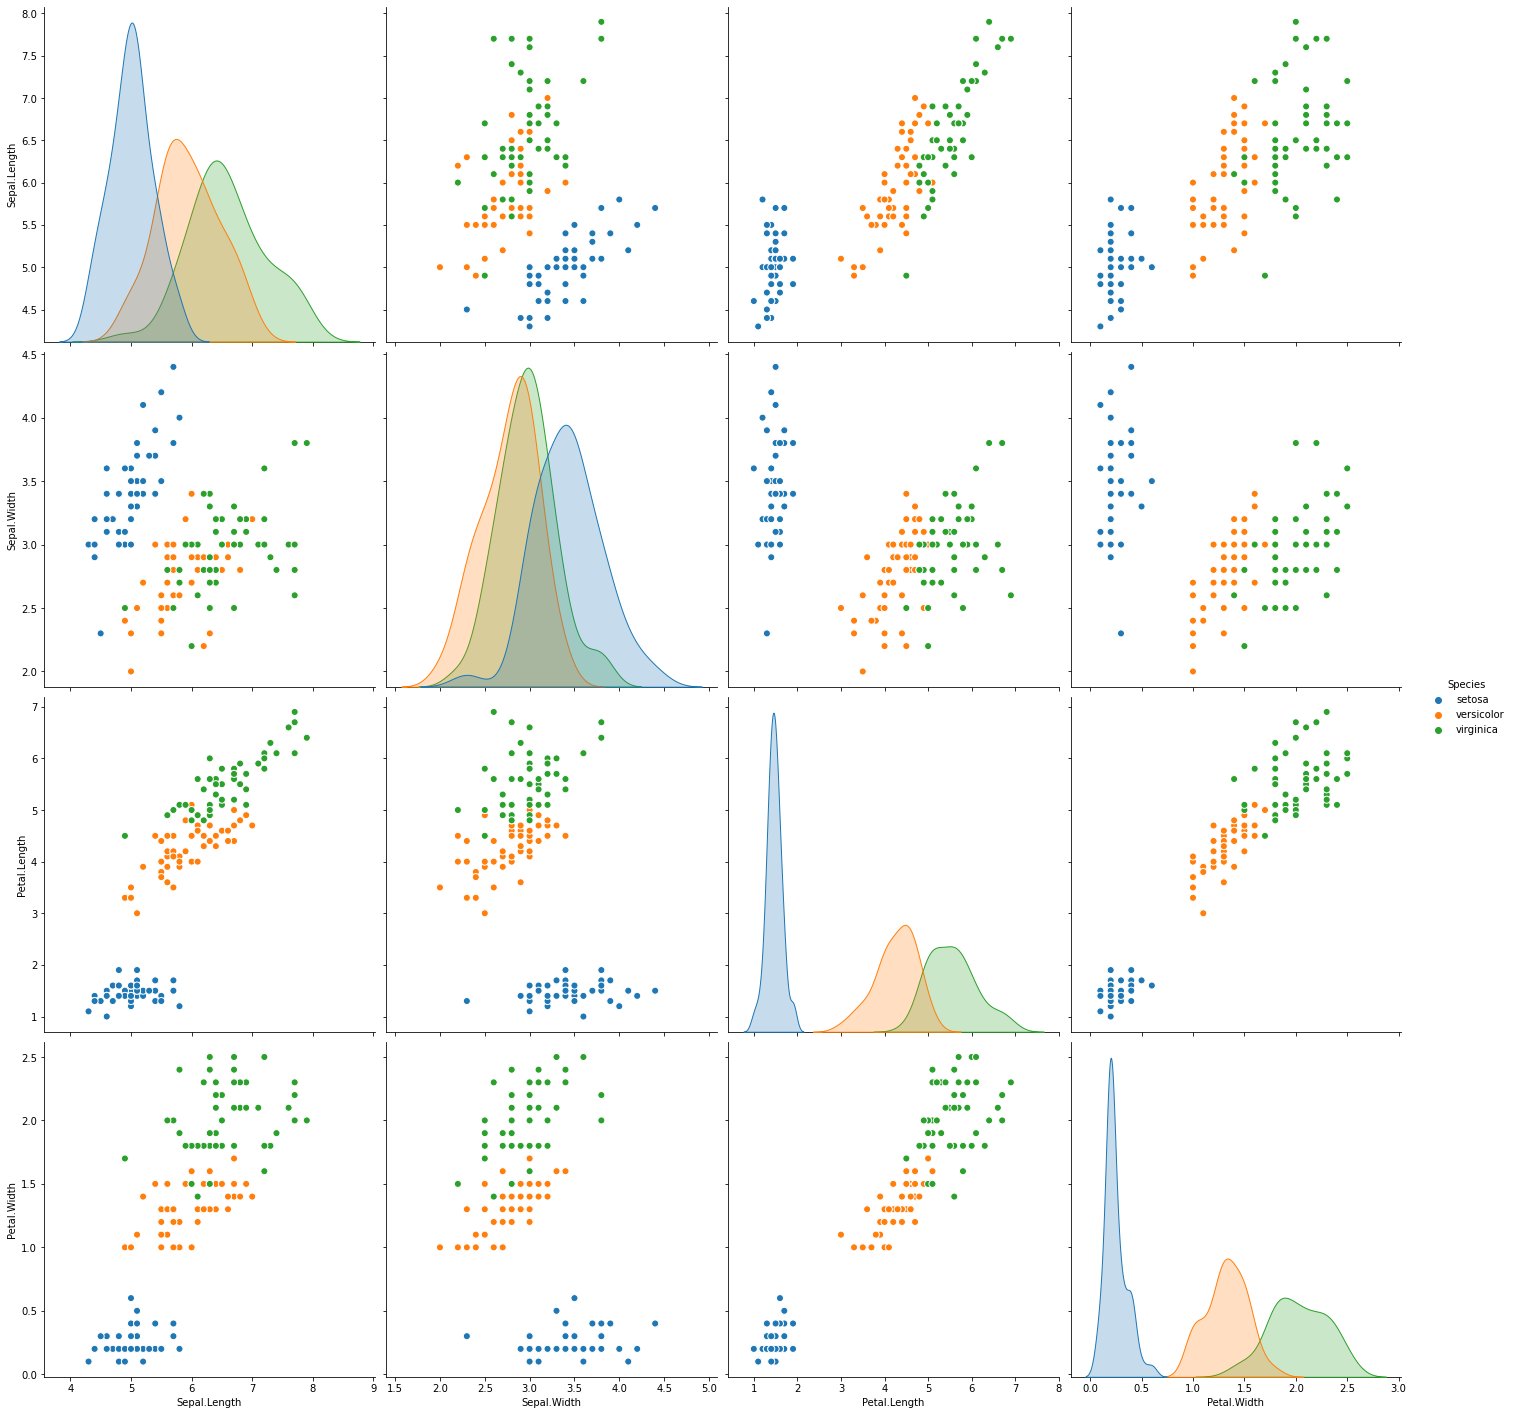

In [12]:
# 실제 iris 데이터의 군집

sb.pairplot( df_iris.drop('km_cluster', axis = 1),
             hue="Species",
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 평가

### 전체 데이터의 개별 실루엣 계수 산출
- `sklearn.metrics.silhouette_samples()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

In [13]:
# df_data 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x,
                                    df_data['km_cluster'] )

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
print()
score_samples

silhouette_samples( ) return 값의 shape (150,)



array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [14]:
# df_data에 실루엣 계수 컬럼 추가
df_data['silhouette_coeff'] = score_samples
df_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,km_cluster,silhouette_coeff
1,5.1,3.5,1.4,0.2,1,0.852955
2,4.9,3.0,1.4,0.2,1,0.815495
3,4.7,3.2,1.3,0.2,1,0.829315
4,4.6,3.1,1.5,0.2,1,0.805014
5,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2,0.425136
147,6.3,2.5,5.0,1.9,0,0.104171
148,6.5,3.0,5.2,2.0,2,0.314930
149,6.2,3.4,5.4,2.3,2,0.352454


In [15]:
df_data.groupby('km_cluster')['silhouette_coeff'].mean()

km_cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 평균 실루엣 계수 산출
- `sklearn.metrics.silhouette_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [16]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x,
                                  df_data['km_cluster'],
                                  random_state = 153 )

print( 'Silhouette Analysis Score: {0:.4f}'.format(average_score) )

Silhouette Analysis Score: 0.5528


### 군집별 실루엣 계수와 평균 실루엣 계수를 비교하여 k값 재조정

< Average_Silhouette_Score >

k = 2 :  0.6810461692117464
k = 3 :  0.5528190123564101
k = 4 :  0.4980505049972878
k = 5 :  0.4930804067193526
k = 6 :  0.36648040289008416



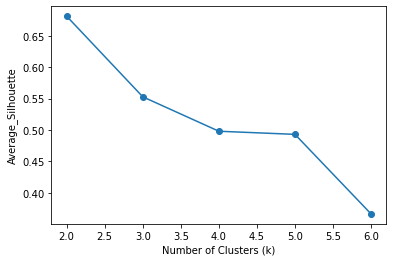

In [17]:
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정

avg_silhouette = list()

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    cluster_kmeans = KMeans( n_clusters = i,
                             init = 'random',
                             max_iter = 300,
                             random_state = 153 )
    model = cluster_kmeans.fit(x)

    avg = silhouette_score( x, model.labels_ )
    print( 'k =',i,': ',avg)

    avg_silhouette.append(avg)
    
print()

plt.plot(range(2,7), avg_silhouette, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average_Silhouette')
plt.show()

In [18]:
silhouette = list()
avg_silhouette = list()

# 군집별 실루엣 계수와 평균 실루엣 계수를 비교

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    cluster_kmeans = KMeans( n_clusters = i,
                             init = 'random',
                             max_iter = 300,
                             random_state = 153 )
    model = cluster_kmeans.fit(x)
    
    score_samples = silhouette_samples( x, model.labels_ )
    silhouette.append(score_samples)
    df = pd.DataFrame( { 'group' : model.labels_,
                         'Coeff' : score_samples,
                         'Avg' : avg } )
    df['Coeff-avg'] = df['Coeff'] - df['Avg']
    display( df.groupby('group')[ ['Coeff','Avg','Coeff-avg'] ].mean() )
    print()

< Average_Silhouette_Score >



,Coeff,Avg,Coeff-avg
group,,,
0,0.769526,0.36648,0.403046
1,0.632701,0.36648,0.266221


,Coeff,Avg,Coeff-avg
group,,,
0,0.417320,0.36648,0.050840
1,0.798140,0.36648,0.431660
2,0.451105,0.36648,0.084625


,Coeff,Avg,Coeff-avg
group,,,
0,0.419518,0.36648,0.053038
1,0.362998,0.36648,-0.003482
2,0.763176,0.36648,0.396695
3,0.321324,0.36648,-0.045157


,Coeff,Avg,Coeff-avg
group,,,
0,0.763176,0.36648,0.396695
1,0.342779,0.36648,-0.023701
2,0.398519,0.36648,0.032039
3,0.405827,0.36648,0.039346
4,0.299765,0.36648,-0.066715


,Coeff,Avg,Coeff-avg
group,,,
0,0.359125,0.36648,-0.007356
1,0.404650,0.36648,0.038170
2,0.408982,0.36648,0.042502
3,0.289906,0.36648,-0.076574
4,0.424343,0.36648,0.057863
5,0.342779,0.36648,-0.023701


## 군집화 수행
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [19]:
# k를 3개로 설정 

cluster_kmeans = KMeans( n_clusters = 2,
                         init = 'random',
                         max_iter = 500,
                         random_state = 153 )

# 모델 학습 수행
model = cluster_kmeans.fit( x )

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [20]:
# 분류된 군집화 값 확인
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# iris 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_data['km_cluster'] = model.labels_
df_iris['km_cluster'] = model.labels_

df_iris.groupby( ['Species', 'km_cluster'] ).count()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    km_cluster                                                      
setosa     0                     50           50            50           50
versicolor 0                      3            3             3            3
           1                     47           47            47           47
virginica  1                     50           50            50           50

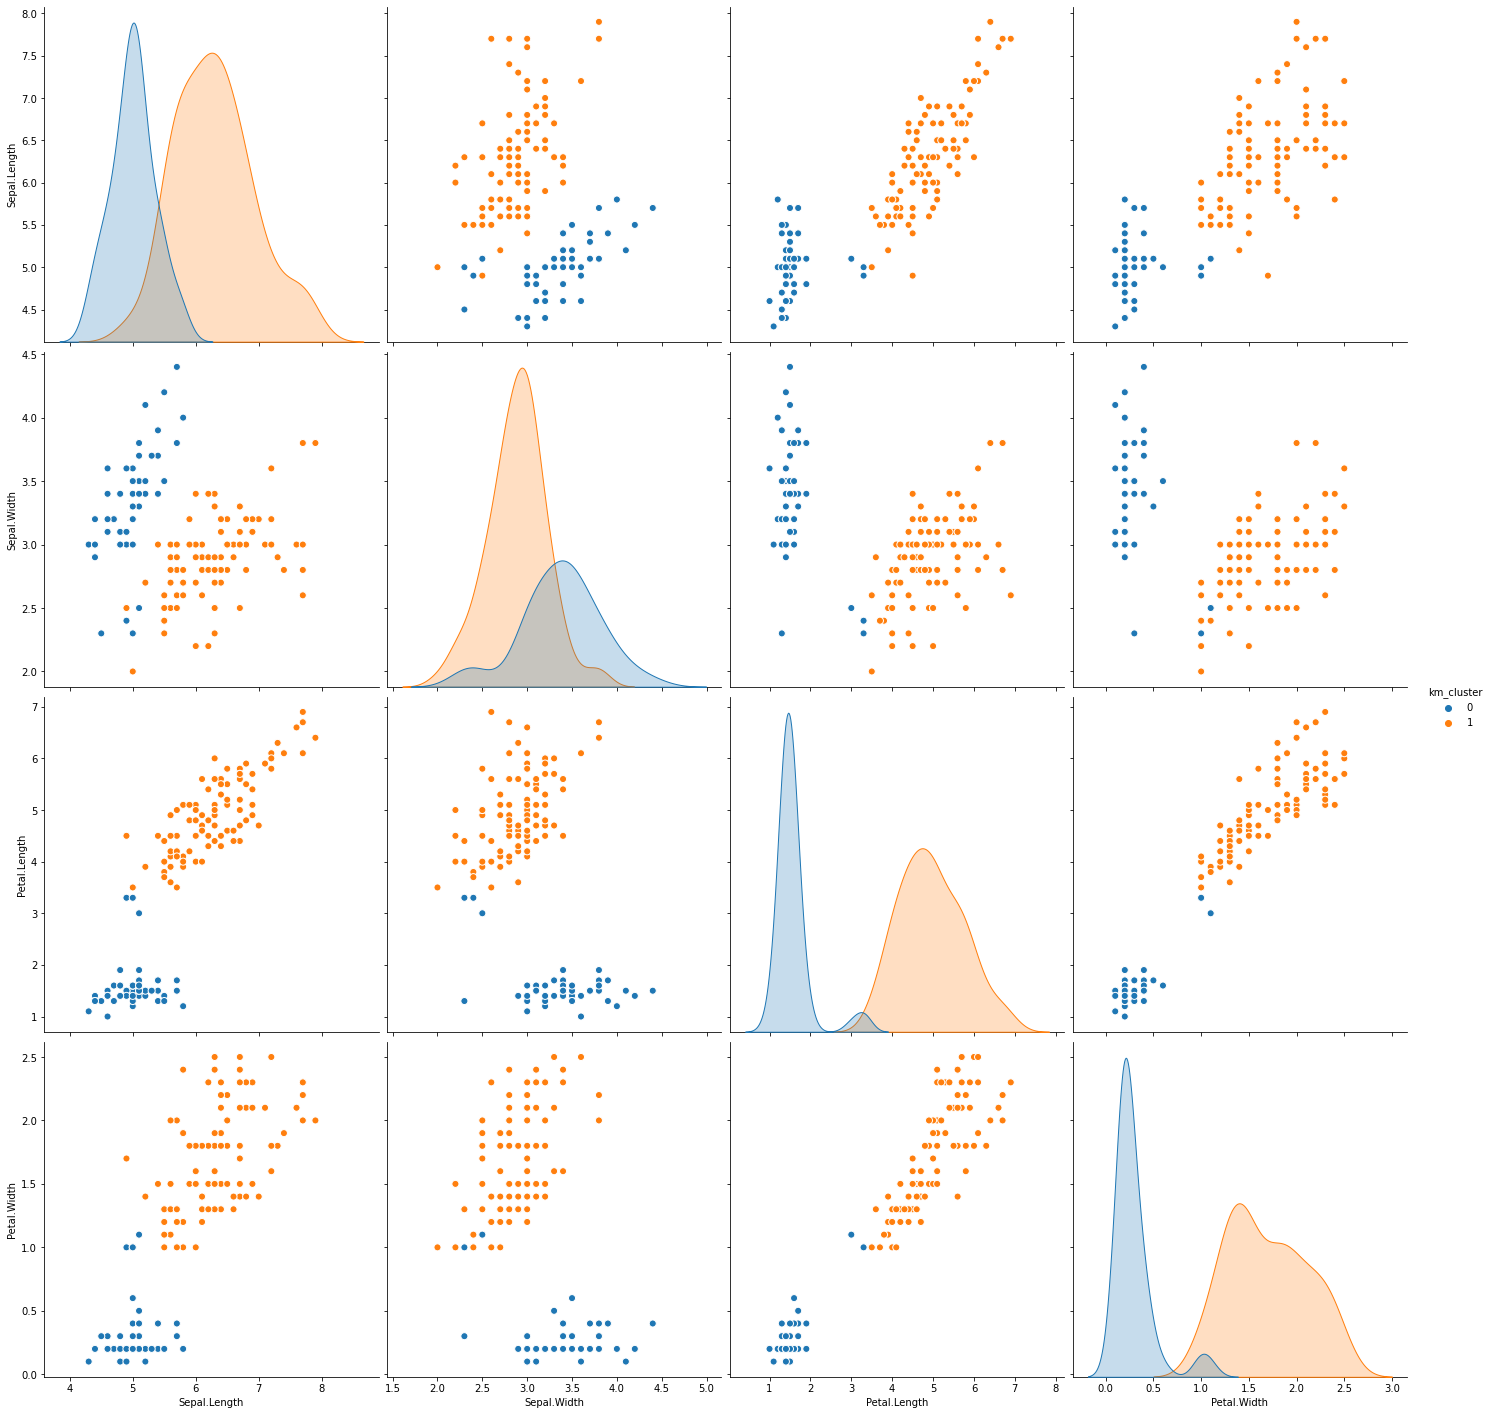

In [22]:
sb.pairplot( df_data.drop('silhouette_coeff', axis = 1),
             hue="km_cluster",
             size=5,
             plot_kws=dict(s=50, linewidth=1) )